In [2]:
#https://theclevermachine.wordpress.com/2014/09/08/derivation-derivatives-for-common-neural-network-activation-functions/

In [35]:
import numpy as np

class DSELinearClassifier(object):
    """DSELinearClassifier  classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Sum-of-squares cost function value in each epoch.
    
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
        
        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size=1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def sigmoid_activation(self, X):
        """logistic activation function"""
        return 1 / (1 + np.exp(-X))
    
    def tanh_activation(self, X):
        """Tanh activation function"""
        return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
    
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X))
                        >= 0.0, 1, -1)

In [30]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)
X = X[y != 2,:]
y = y[y!=2]
y[y==0]=-1


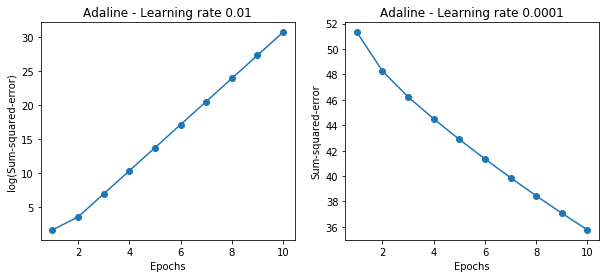

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.33, random_state=42)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = DSELinearClassifier(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = DSELinearClassifier(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [34]:
print(ada1.w_)

[-3.09634211e+14 -1.72237950e+15 -9.51763865e+14 -9.47321172e+14
 -2.66579668e+14]
